# Preliminaries

Python version: python 3.5.2

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

# Generation of samples

## Variables used
- x1points: x1 values correspoding to the 400 samples.
- x2points: x2 values correspoding to the 400 samples.
- noise: 400 noise values generated using normal distribution $\mathcal{N}(0, 0.01)$.
- X: 400 input samples obtained by concatenating x1points and x2points row-wise.
- Yobv: Values generated using the equation $y = 2*x_1 + 3*x_2 +\epsilon $

In [2]:
x1points = np.random.uniform(low=-4, high=4, size=400).reshape((400,1))
x2points = np.random.uniform(low=-4, high=4, size=400).reshape((400,1))
noise = np.random.normal(0, 0.01, 400).reshape((400,1))
Yobv = 2*x1points+3*x2points+noise
X = np.concatenate((x1points,x2points),axis=1)
print(x1points.shape,x2points.shape,noise.shape,X.shape,Yobv.shape)

(400, 1) (400, 1) (400, 1) (400, 2) (400, 1)


# Objective function

Squared error loss function $J$ is as defined below


\begin{align}
    J &= \frac{1}{2} \sum\limits_{i=1}^n (Yobv_i - Ypred_i)^2 \tag{1}\\
\end{align}

Here,
<center>
$n = $ The number of samples <br />
$Yobv = $ The obseved values <br />
$Ypred = w_1*x_1+w_2*x_2$ = The predicted values <br />
</center>


One can also scale the error function $J$ with $\frac{1}{n}$, the number of samples. The modified definition of $J$ is as below.

$$J = \frac{1}{2n} \sum\limits_{i=1}^n (Yobv_i - Ypred_i)^2$$

#  Plotting error curve with respect to the parameters

Objective function is J.

Paramerters (weights $W$) are coeff1 and coeff2 which are coefficients of $x_1$ and $x_2$ respectively. To plot the error curve, the values of coeff1 and coeff2 are selected from the interval $[-2.5, 7]$ with stride $0.05$.

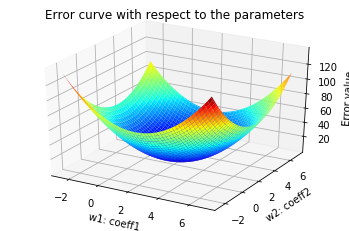

In [3]:
coeff1, coeff2 = np.meshgrid(np.arange(-2.5, 7, 0.05), np.arange(-2.5, 7, 0.05)) 
numpoints = coeff1.shape[0]
coeff1 = coeff1.reshape((numpoints**2,1))
coeff2 = coeff2.reshape((numpoints**2,1))
Wgrid = np.concatenate((coeff1,coeff2),axis=1)
#print(Wgrid.shape)
Jgrid = []
for w in Wgrid:
    Ypred = np.dot(w,X.T).reshape((400,1))
    err = np.mean(np.square(Yobv-Ypred))/2
    Jgrid.append(err)
Jgrid = np.array(Jgrid).reshape((numpoints,numpoints))
#print(Wgrid.shape,Jgrid.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('w1: coeff1')
ax.set_ylabel('w2: coeff2')
ax.set_zlabel('Error value')
ax.set_title('Error curve with respect to the parameters')
ax.plot_surface(coeff1.reshape((numpoints,numpoints)),
                coeff2.reshape((numpoints,numpoints)),
                Jgrid,cmap='jet', edgecolor='none')
plt.show()

# Optimum learning rate $\eta_{opt}$

As the number of variables (weights $W = [w_1, w_2]$) involed in $J$ are 2, the resultant shape of erorr curve is paraboloid.

The equation of paraboloid can be written as below



\begin{align}
    J &= \frac{1}{2} W^T A W + W^T b + c \tag{2}\\ 
\end{align}

From Newton method, we know that $$\eta_{opt} = \biggl( \frac{\partial^{2} J}{\partial w^2}\biggr)^{-1} = A^{-1}$$

So, let's bring the eq.(1) in the form of eq.(2)

\begin{align}
    J &= \frac{1}{2} \sum\limits_{i=1}^n (Yobv_i - Ypred_i)^2 \\
      &= \frac{1}{2} (Yobv - X^{T} W)^2 \\
      &= \frac{1}{2} (Yobv - X^{T} W)^T (Yobv - X^{T} W)\\
      &= \frac{1}{2} (Yobv^{T}Yobv - Yobv^{T}X^{T}W - W^{T}XYobv + W^{T}XX^{T}W) \\
      &= \frac{1}{2}W^{T}XX^{T}W - W^{T}XYobv + \frac{1}{2}Yobv^{T}Yobv \tag{3}\
\end{align}

By comparing eq.(1) and eq.(3)

\begin{align}
    A &= XX^{T} \\
    b &= -XYobv \\
    c &= \frac{1}{2}Yobv^{T}Yobv \
\end{align}

As $J$ is convex (paraboloid), The hessian matrix, $A$ is always positive definite and have the positive eigenvalues. 


$$
A = XX^{T} =
\left[ {\begin{array}{cccc}
\frac{\partial^{2} J}{\partial w^{2}_{1}} & \frac{\partial^{2} J}{\partial w_1 w_2} \\
\frac{\partial^{2} J}{\partial w_1 w_2} & \frac{\partial^{2} J}{\partial w^{2}_{2}} \\
\end{array} } \right] = \left[ {\begin{array}{cccc}
x_{1}^2 & x_{1}x_{2} \\
x_{1}x_{2} & x_{2}^2 \\
\end{array} } \right]
$$

We know the follwing conditions to avoid divergence.

$$\eta < 2\eta_{opt}$$

$$\eta < \frac{2}{\lambda _{max}}$$


Here, $\lambda _{max}$ is maximum eigen value of the hessian $A$. By comparing the above inequalities, we can choose $\eta_{opt}$ as $\frac{1}{\lambda _{max}}$


<!--- Each diagnol element of A represents the second partial derivative of J with respect to correspoding parameter (weight). So, the inverse of diagnoal elemets represent the optimal learning rates correspoding to the parameters. i.e Optimal learning rate is different for the different coordinates.

$$
A=
\left[ {\begin{array}{cccc}
a_{11} & a_{12} \\
a_{21} & a_{22} \\
\end{array} } \right]
$$

So, $\eta_{opt}$ correspoding to w_1 dimension is $(a_{11})^{-1}$ and $\eta_{opt}$ correspoding to w_2 dimension is $(a_{22})^{-1}$.


However, in vanilla gradient descent the same learning rate $\eta$ is applied to all components. So, the smallest $\eta$ from $\eta_{opt}$ corresponding to all components is choosen as final learning rate. i.e $ min (a_{11}^{-1},a_{22}^{-1})$

A = np.matmul(X.T,X)
Ainv = np.linalg.inv(A)
print("Inverse(A)= ",Ainv)
Ainvdiagnol = np.diagonal(Ainv)
eta_opt = min(Ainvdiagnol)
print("\n Optimal learning rate = ", eta_opt)

--->

In [4]:
A = np.matmul(X.T,X)
Aeigvals = np.linalg.eigvals(A)
eta_opt = 1/max(Aeigvals)
print("Optimal learning rate = ", eta_opt)

Optimal learning rate =  0.00044424282921820074


# Gradient descent with differant $\eta$ values

$$ \eta = \frac{0.9 \eta_{opt}}{2},\frac{1.5 \eta_{opt}}{2}, \eta_{opt}, 1.5 \eta_{opt}  $$

In [5]:
eta_values = [0.45*eta_opt, 0.75*eta_opt, eta_opt, 1.5*eta_opt]
labels = ['0.45*eta_opt','0.75*eta_opt','eta_opt','1.5*eta_opt']
J_values = [[],[],[],[]]
W_values = [[],[],[],[]]

In [6]:
def calc_J(W,X,Yobv,Ypred):
    return np.mean(np.square(Yobv-Ypred))/2

In [7]:
def calc_dW(W,X,Yobv,Ypred):
    return np.sum(-(Yobv-Ypred)*X,axis=0)

In [8]:
for i in range(4):
    J = 1000000
    W = np.array([-0.01,0.01]).reshape((1,2))
    eta = eta_values[i]
    while(J>0.001):
        Ypred = np.dot(W,X.T).reshape((400,1))
        dW = calc_dW(W,X,Yobv,Ypred)
        W = W-(eta*dW)
        J = calc_J(W,X,Yobv,Ypred)
        J_values[i].append(J.flatten())
        W_values[i].append(W.flatten())
        
    print("Number of epochs for eta = {} is {}".format(labels[i],len(J_values[i])))

Number of epochs for eta = 0.45*eta_opt is 11
Number of epochs for eta = 0.75*eta_opt is 6
Number of epochs for eta = eta_opt is 4
Number of epochs for eta = 1.5*eta_opt is 9


# Plots: Learning rate - Error - Epochs

The order of learning rate values sorted in increasing order of their corresponding number of epochs taken to converge.

$$ \eta_{opt}, \frac{1.5 \eta_{opt}}{2}, 1.5 \eta_{opt}, \frac{0.9 \eta_{opt}}{2} $$

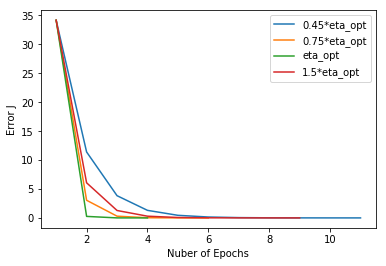

In [13]:
f = plt.figure(0)
plt.xlabel("Nuber of Epochs")
plt.ylabel("Error J")
for i in range(4):
    plt.plot(np.array(range(len(J_values[i])))+1, J_values[i], label=labels[i])

plt.legend()
f.show()

# Contour plots for all $\eta$ values

(70, 60) (70, 60)


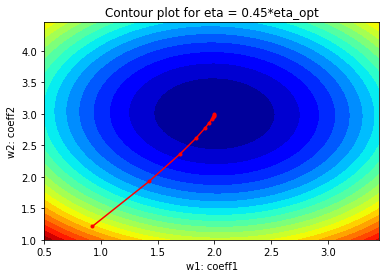

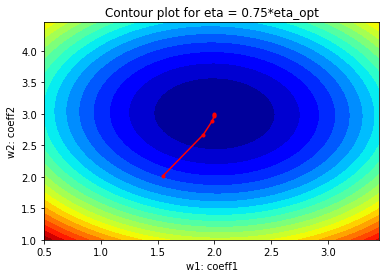

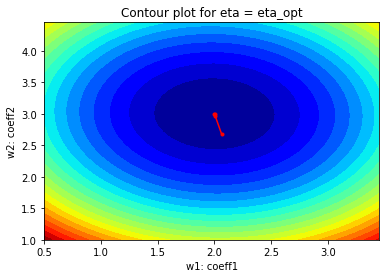

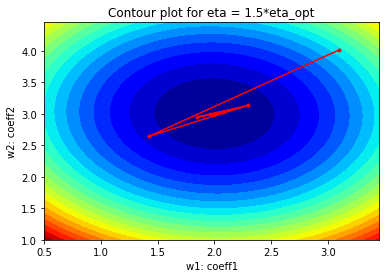

In [10]:
coeff1, coeff2 = np.meshgrid(np.arange(0.5, 3.5, 0.05), np.arange(1, 4.5, 0.05)) 
numpoints1 = coeff1.shape[0]
numpoints2 = coeff1.shape[1]
print(coeff1.shape,coeff2.shape)
coeff1 = coeff1.reshape((numpoints1*numpoints2,1))
coeff2 = coeff2.reshape((numpoints1*numpoints2,1))
Wgrid = np.concatenate((coeff1,coeff2),axis=1)
#print(Wgrid.shape)
Jgrid = []
for w in Wgrid:
    Ypred = np.dot(w,X.T).reshape((400,1))
    err = np.mean(np.square(Yobv-Ypred))/2
    Jgrid.append(err)
Jgrid = np.array(Jgrid).reshape((numpoints1,numpoints2))
#print(Wgrid.shape,Jgrid.shape)


for i in range(4):
    fig = plt.figure(i)
    ax = plt.axes()
    ax.set_xlabel('w1: coeff1')
    ax.set_ylabel('w2: coeff2')
    #ax.set_zlabel('Error value')
    ax.set_title('Contour plot for eta = '+labels[i])
    ax.contourf(coeff1.reshape((numpoints1,numpoints2)),
                coeff2.reshape((numpoints1,numpoints2)),
                Jgrid,cmap='jet',linestyles = 'solid',levels=20)
    plt.plot(np.array(W_values[i])[:,0],np.array(W_values[i])[:,1], marker = '.',color='red')
    plt.show()